# Emotion Detection ML Model

The goal of this project is to create a ML model to accurately predict the emotion of
a text message. All data used in this project was pulled from:
https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp

This notebook will be split into three sections:

* Data Analysis and Cleaning
* Model Selection and Training
* Model Evaluation

## Data Analysis and Cleaning

This section is fairly short as the dataset I pulled from kaggle was already relatively clean.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Note: The data was already in a train/test/val(8/1/1) split. I created full_data to train the final model.


In [3]:
test_data = pd.read_csv("../emotionDetection/test.txt", header=None, sep=";", names=["Comment","Emotion"], encoding="utf-8")
train_data = pd.read_csv("../emotionDetection/train.txt", header=None, sep=";", names=["Comment","Emotion"], encoding="utf-8")
val_data = pd.read_csv("../emotionDetection/val.txt", header=None, sep=";", names=["Comment","Emotion"], encoding="utf-8")
full_data = train_data.append([test_data, val_data])

In [27]:
dict = {'train': len(train_data), 'test': len(test_data), 'validation': len(val_data)}
dict

{'train': 16000, 'test': 2000, 'validation': 2000}

In [24]:
full_data.reset_index()

,index,Comment,Emotion
0,0,i didnt feel humiliated,sadness
1,1,i can go from feeling so hopeless to so damned...,sadness
2,2,im grabbing a minute to post i feel greedy wrong,anger
3,3,i am ever feeling nostalgic about the fireplac...,love
4,4,i am feeling grouchy,anger
...,...,...,...
19995,1995,im having ssa examination tomorrow in the morn...,sadness
19996,1996,i constantly worry about their fight against n...,joy
19997,1997,i feel its important to share this info for th...,joy
19998,1998,i truly feel that if you are passionate enough...,joy


In [9]:
train_data.head()

,Comment,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [10]:
train_data['Emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

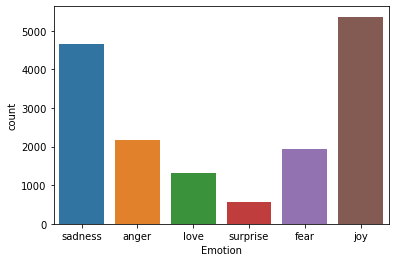

In [11]:
sns.countplot(data=train_data, x='Emotion')

In [28]:
full_data.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [29]:
full_data['Comment'].str.isspace().sum()

0

In [31]:
full_data['Comment'].str.islower().sum()

20000

## Model Selection and Training

In [194]:
X = pd.DataFrame(full_data['Comment'])
y = full_data['Emotion']

X_train = train_data['Comment']
X_test = test_data['Comment']
X_val = val_data['Comment']
y_train = train_data['Emotion']
y_test = test_data['Emotion']
y_val = val_data['Emotion']


#### Combining the TF-IDF vectorizer with a selection of models in a pipeline for easier model selection

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [104]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
nbPipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')), ('nb', MultinomialNB())])
linearSvcPipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')), ('lsvc', LinearSVC())])
svcPipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')), ('svc', SVC())])
logPipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')), ('log', LogisticRegression(max_iter=5000))])

In [105]:
nbPipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('nb', MultinomialNB())])

In [106]:
linearSvcPipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('lsvc', LinearSVC())])

In [107]:
svcPipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('svc', SVC())])

In [108]:
logPipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('log', LogisticRegression(max_iter=5000))])

#### Generating performance reports for all the baseline models.

In [109]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [110]:
def report(pipe, X_test, y_test):
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(pipe, X_test, y_test)

/Users/Caspinprince/.conda/envs/emotionDetection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Caspinprince/.conda/envs/emotionDetection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Caspinprince/.conda/envs/emotionDetection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

              precision    recall  f1-score   support

       anger       0.96      0.35      0.51       275
        fear       0.89      0.32      0.47       224
         joy       0.66      0.98      0.79       695
        love       1.00      0.06      0.12       159
     sadness       0.68      0.91      0.78       581
    surprise       0.00      0.00      0.00        66

    accuracy                           0.69      2000
   macro avg       0.70      0.44      0.44      2000
weighted avg       0.74      0.69      0.63      2000



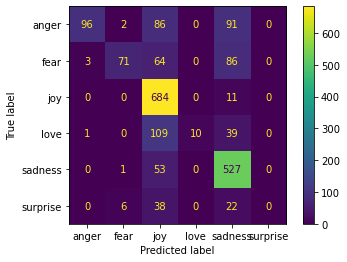

In [111]:
report(nbPipe, X_test, y_test)

              precision    recall  f1-score   support

       anger       0.88      0.89      0.88       275
        fear       0.87      0.86      0.86       224
         joy       0.91      0.93      0.92       695
        love       0.78      0.78      0.78       159
     sadness       0.93      0.92      0.93       581
    surprise       0.76      0.68      0.72        66

    accuracy                           0.89      2000
   macro avg       0.85      0.84      0.85      2000
weighted avg       0.89      0.89      0.89      2000



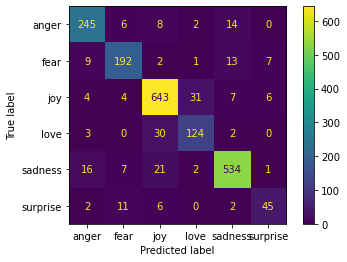

In [112]:
report(linearSvcPipe, X_test, y_test)

              precision    recall  f1-score   support

       anger       0.89      0.81      0.85       275
        fear       0.86      0.82      0.84       224
         joy       0.83      0.96      0.89       695
        love       0.83      0.59      0.69       159
     sadness       0.91      0.91      0.91       581
    surprise       0.88      0.55      0.67        66

    accuracy                           0.87      2000
   macro avg       0.87      0.77      0.81      2000
weighted avg       0.87      0.87      0.86      2000



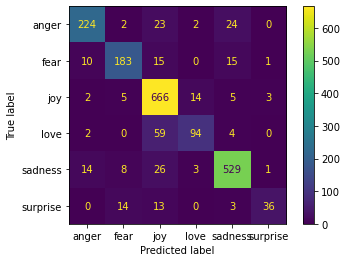

In [113]:
report(svcPipe, X_test, y_test)

              precision    recall  f1-score   support

       anger       0.89      0.81      0.85       275
        fear       0.87      0.81      0.84       224
         joy       0.85      0.95      0.89       695
        love       0.78      0.64      0.70       159
     sadness       0.90      0.92      0.91       581
    surprise       0.92      0.50      0.65        66

    accuracy                           0.87      2000
   macro avg       0.87      0.77      0.81      2000
weighted avg       0.87      0.87      0.86      2000



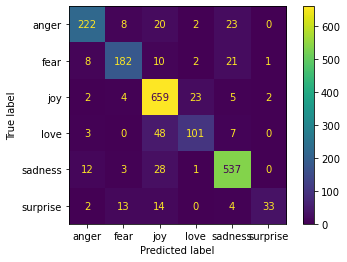

In [114]:
report(logPipe, X_test, y_test)

#### Performing a grid search to compare support vector machine with different kernels and parameters.

In [27]:
from sklearn.model_selection import GridSearchCV

In [96]:
finalSvcPipe = Pipeline([('tfidf', TfidfVectorizer()), ('svc', SVC())])

In [100]:
param_grid = {'svc__kernel': ['linear', 'rbf'],
              'svc__gamma': [1, 0.1, 0.01, 0.001],
              'svc__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(finalSvcPipe,param_grid, refit=True, verbose=2, cv=3, n_jobs=-1)

In [101]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10],
                         'svc__gamma': [1, 0.1, 0.01, 0.001],
                         'svc__kernel': ['linear', 'rbf']},
             verbose=2)

In [102]:
grid.best_params_

{'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': 'linear'}

In [103]:
grid.best_score_

0.8761873193565036

#### Creating a pipeline using LinearSVC for faster and marginally better performance than SVC w/ linear kernel.

In [135]:
finalLinearSvcPipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                               ('lsvc', LinearSVC())])

#### Performing a grid search for the best parameters for the final model.

In [136]:
linearsvc_param_grid = {'lsvc__penalty': ['l1', 'l2'], 'lsvc__C': [0.001, 0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10]}
grid = GridSearchCV(finalLinearSvcPipe, linearsvc_param_grid, refit=True, verbose=2, cv=3, n_jobs=-1)

In [137]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/Users/Caspinprince/.conda/envs/emotionDetection/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.34343746        nan 0.60574992        nan 0.86612474
        nan 0.88374978        nan 0.88524976        nan 0.88299985
        nan 0.87743727        nan 0.86843715        nan 0.85987475]
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words='english')),
                                       ('lsvc', LinearSVC())]),
             n_jobs=-1,
             param_grid={'lsvc__C': [0.001, 0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10],
                         'lsvc__penalty': ['l1', 'l2']},
             verbose=2)

In [138]:
grid.best_params_

{'lsvc__C': 0.5, 'lsvc__penalty': 'l2'}

In [139]:
grid.best_score_

0.8852497647432173

              precision    recall  f1-score   support

       anger       0.92      0.89      0.91       275
        fear       0.86      0.80      0.83       212
         joy       0.90      0.94      0.92       704
        love       0.87      0.83      0.85       178
     sadness       0.91      0.93      0.92       550
    surprise       0.85      0.79      0.82        81

    accuracy                           0.90      2000
   macro avg       0.89      0.86      0.87      2000
weighted avg       0.90      0.90      0.90      2000



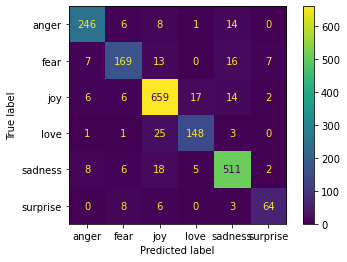

In [163]:
y_val_pred = grid.predict(X_val)
print(classification_report(y_val, y_val_pred))
plot_confusion_matrix(grid, X_val, y_val)

###  * * * Final model comes out to an accuracy of approximately 90%. * * *

Creating the final model using LinearSVC and a C value of 0.5. Fit the model on all data.

In [151]:
finalModel = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                       ('lsvc', LinearSVC(C=0.5))])

In [153]:
finalModel.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('lsvc', LinearSVC(C=0.5))])

#### Saved the final model as a .pkl file

In [154]:
import joblib

In [155]:
joblib.dump(finalModel, 'finalModel.pkl')

['finalModel.pkl']

In [156]:
loadedModel = joblib.load('finalModel.pkl')

In [198]:
loadedModel.predict(['i am very mad at you'])

array(['anger'], dtype=object)